In [20]:
%matplotlib inline

In [21]:
from bigbang.archive import Archive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

One interesting question for open source communities is whether they are *growing*. Often the founding members of a community would like to see new participants join and become active in the community. This is important for community longevity; ultimatley new members are required to take leadership roles if a project is to sustain itself over time.

The data available for community participation is very granular, as it can include the exact traces of the messages sent by participants over a long history. One way of summarizing this information to get a sense of overall community growth is a *cohort visualization*.

In this notebook, we will produce a visualization of changing participation over time.

In [22]:
url = "6lo"
arx = Archive(url, archive_dir="../archives")

In [23]:
arx.data[:1]

,From,Subject,Date,In-Reply-To,References,Body
Message-ID,,,,,,
<20130524181840.1900.71091.idtracker@ietfa.amsl.com>,IETF Secretariat <ietf-secretariat@ietf.org>,[6lo] New Non-WG Mailing List: 6lo -- Mailing ...,2013-05-24 18:18:40+00:00,None,None,A new IETF non-working group email list has be...


Archive objects have a method that reports for each user how many emails they sent each day.

In [24]:
act = arx.get_activity()

This plot will show when each sender sent their first post. A slow ascent means a period where many people joined.

In [25]:
fig = plt.figure(figsize=(12.5, 7.5))

# act.idxmax().order().T.plot()
(act > 0).idxmax().order().plot()

fig.axes[0].yaxis_date()

AttributeError: 'Series' object has no attribute 'order'

<Figure size 900x540 with 0 Axes>

This is the same data, but plotted as a histogram. It's easier to see the trends here.

In [9]:
fig = plt.figure(figsize=(12.5, 7.5))

(act > 0).idxmax().order().hist()

fig.axes[0].xaxis_date()

AttributeError: 'Series' object has no attribute 'order'

<Figure size 900x540 with 0 Axes>

While this is interesting, what if we are interested in how much different "cohorts" of participants stick around and continue to participate in the community over time?

What we want to do is divide the participants into N cohorts based on the percentile of when they joined the mailing list.  I.e, the first 1/N people to participate in the mailing list are the first cohort. The second 1/N people are in the second cohort. And so on.

Then we can combine the activities of each cohort and do a stackplot of how each cohort has participated over time.

In [8]:
n = 5

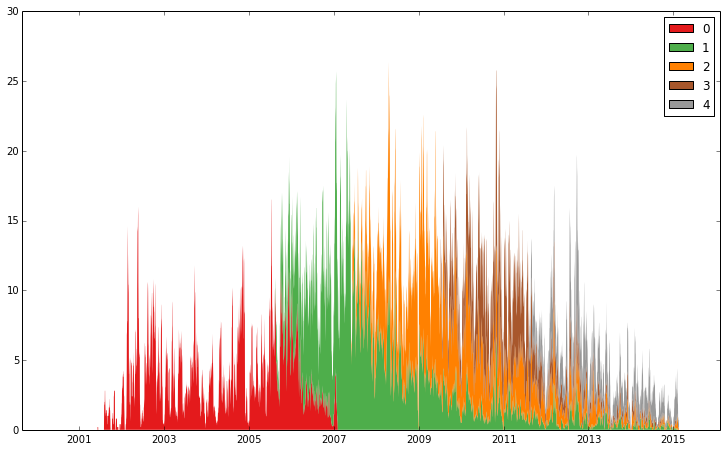

In [9]:
from bigbang import plot

# A series, indexed by users, of the day of their first post
# This series is ordered by time
first_post = (act > 0).idxmax().order()

# Splitting the previous series into five equal parts,
# each representing a chronological quintile of list members
cohorts = np.array_split(first_post, n)
cohorts = [list(c.keys()) for c in cohorts]

plot.stack(act, partition=cohorts, smooth=10)

This gives us a sense of when new members are taking the lead in the community. But what if the old members are just changing their email addresses? To test that case, we should clean our data with entity resolution techniques.

In [ ]:
cohorts[1].index.values